In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

/Users/abhisheksubramanian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


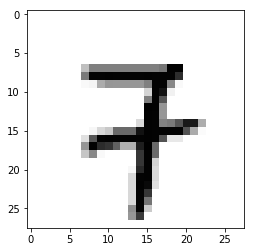

In [5]:
plt.imshow(mnist.train.images[14].reshape(28,28),cmap="Greys")

First we will begin by coding the generator network

In [6]:
def generator(z,reuse=None): #   z is random noise
    with tf.variable_scope('gen',reuse = reuse):
        hidden1 = tf.layers.dense(inputs=z,units = 128)
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden1 = tf.layers.dense(inputs = hidden1,units=128)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        out = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        
        return out
        

In [7]:
def discriminator(X,reuse=None): #   z is random noise
    with tf.variable_scope('dis',reuse = reuse):
        hidden1 = tf.layers.dense(inputs=X,units = 128)
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden1 = tf.layers.dense(inputs = hidden1,units=128)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        logits = tf.layers.dense(hidden2,units=1)
        output = tf.sigmoid(logits)
        return output,logits

In [8]:
real_images = tf.placeholder(tf.float32,shape=[None,784])
z = tf.placeholder(tf.float32,shape=[None,100])


In [9]:
G = generator(z)


In [10]:
D_output_real, D_logits_real = discriminator(real_images)

In [11]:
D_output_fake, D_logits_fake = discriminator(G,reuse=True)

In [12]:
### Loss function

def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_in,labels = labels_in))

In [14]:
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_fake))



In [15]:
D_loss = D_real_loss + D_fake_loss

In [16]:
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))


In [17]:
learning_rate = 0.001


In [18]:
tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [23]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss,var_list = d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss,var_list = g_vars)

In [24]:
batch_size = 100


In [32]:

epochs = 2

In [33]:
  init = tf.global_variables_initializer()

In [34]:
samples = []

In [41]:
a = np.random.normal(size=55000)
b = np.random.normal(size=55000)

In [42]:
df = pd.DataFrame({'a':a,"b":b})

In [43]:
df

,a,b
0,-0.718602,0.047181
1,-0.912377,-0.597026
2,-2.489513,-0.547782
3,-0.379077,0.294650
4,-0.060710,0.400622
5,-1.042934,0.481567
6,-2.033145,-0.430684
7,-1.659076,-0.732045
8,0.026683,-1.322109
9,0.312243,0.292446


In [46]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        print(epoch)
        num_batches = df.shape[0] // batch_size#mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            batch = df.iloc[:batch_size,:].values#mnist.train.next_batch(batch_size)
            
            batch_images = batch.reshape(batch_size,2)#batch[0].reshape((batch_size),2)
            
            batch_images = batch_images*2-1
            
            batch_z = np.random.uniform(-1,1,size=(batch_size,100))
            
            _ = sess.run(D_trainer,feed_dict = {real_images:batch_images,z:batch_z})
            _ = sess.run(G_trainer,feed_dict = {z:batch_z})
            
        print("On Epoch {}".format(epoch))
         
        sample_z = np.random.uniform(-1,1,size=(1,100))
        
        gen_sample = sess.run(generator(z,reuse=True),{z:sample_z}
                             )
        
        samples.append(gen_sample) 

0


ValueError: Cannot feed value of shape (100, 2) for Tensor 'Placeholder:0', which has shape '(?, 784)'

In [29]:
mnist.train.num_examples

55000

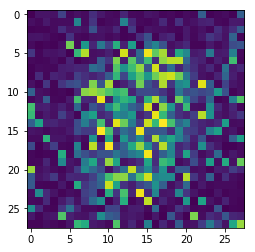

In [38]:
plt.imshow(samples[1].reshape(28,28))